In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We choose to visualize data from the 2021 MLB season, looking at pitcher stats before an after an enforcement about rules referring to "sticky stuff" that would likely affect pitcher performance.

In [55]:
k9_before = np.loadtxt('/homes/jasonmeyer/CS240/visual_project/Data/k9_before.csv', delimiter = ",", skiprows = 1, usecols = 8, converters = {8:lambda x : x[1:-1]})
k9_before_labels = np.loadtxt('/homes/jasonmeyer/CS240/visual_project/Data/k9_before.csv', delimiter = ",", dtype = "str", skiprows = 1, usecols = 0, converters = {0:lambda x : x[1:-1]})


In [56]:
k9_after = np.loadtxt('/homes/jasonmeyer/CS240/visual_project/Data/k9_after.csv', delimiter = ",", skiprows = 1, usecols = 8, converters = {8:lambda x : x[1:-1]})
k9_after_labels = np.loadtxt('/homes/jasonmeyer/CS240/visual_project/Data/k9_after.csv', delimiter = ",", dtype = "str", skiprows = 1, usecols = 0, converters = {0:lambda x : x[1:-1]})


In [57]:
k9_before
k9_before_labels

array(['Jacob deGrom', 'Zack Wheeler', 'Gerrit Cole', 'Brandon Woodruff',
       'Kevin Gausman', 'Trevor Rogers', 'Clayton Kershaw',
       'Tyler Glasnow', 'Nathan Eovaldi', 'Taijuan Walker',
       'Shane Bieber', 'Max Scherzer', 'Yu Darvish', 'Zach Eflin',
       'Aaron Nola', 'Julio Urias', 'Lance Lynn', 'Freddy Peralta',
       'Sean Manaea', 'Chris Bassitt', 'Joe Musgrove', 'Tyler Mahle',
       'German Marquez', 'Sandy Alcantara', 'Kyle Gibson', 'Trevor Bauer',
       'Pablo Lopez', 'Jordan Montgomery', 'Matthew Boyd',
       'Austin Gomber', 'John Means', 'Walker Buehler', 'Jose Berrios',
       'Ian Anderson', 'Zack Greinke', 'Anthony DeSclafani',
       'Frankie Montas', 'Cole Irvin', 'Marcus Stroman', 'Mike Minor',
       'Lucas Giolito', 'Garrett Richards', 'Steven Matz',
       'Charlie Morton', 'Merrill Kelly', 'Hyun-Jin Ryu', 'Nick Pivetta',
       'Antonio Senzatela', 'Aaron Civale', 'Dallas Keuchel',
       'Luis Castillo', 'Robbie Ray', 'Adam Wainwright', 'Zach Davie

In [58]:
print("length before = " + str(len(k9_before)))
print("length after = " + str(len(k9_after)))

length before = 63
length after = 40


In [59]:
k9_before_filtered = k9_before[[name in k9_after_labels for name in k9_before_labels]]
print(len(k9_before_filtered))
k9_after_filtered = k9_after[[name in k9_before_labels for name in k9_after_labels]]

27


We choose to visualize K/9 with each player as the x axis and their k/9 as the y.

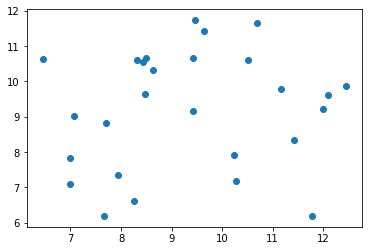

In [60]:
fig,ax = plt.subplots()
ax.scatter(k9_before_filtered, k9_after_filtered)